# Handwritten Digits Recognition Models

**Objective:** Use Handwritten Digits data (from `sklearn.datasets.load_digits`) to build a classification model to identify the digits (from 0 to 9).

*Note:This notebook contains (edited/augmented) code from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.*

### Import libraries

In [1]:
# image data
from sklearn.datasets import load_digits

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Load data

In [2]:
# load data
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

In [3]:
# data for the first three images
digits.images[:3]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

In [4]:
# the first record (image pixles)
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
# lable for the first image
digits.target[0]

0

### Visualize data

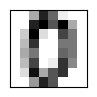

In [6]:
plt.figure(figsize=(1, 1))
plt.imshow(digits.images[0], cmap='binary')
plt.xticks([])
plt.yticks([]);

Since these images are small (containing only 64 pixles), it's a bit difficult to see it clearly. We can use interpolation technique to improve visibility.

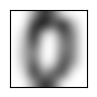

In [7]:
plt.figure(figsize=(1, 1))
plt.imshow(digits.images[0], cmap='binary', interpolation='bicubic')
plt.xticks([])
plt.yticks([]);

_**Useful Resource:**_ [Matplotlib: Image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)

Let's take a look at the first 100 images, along with their true lables.

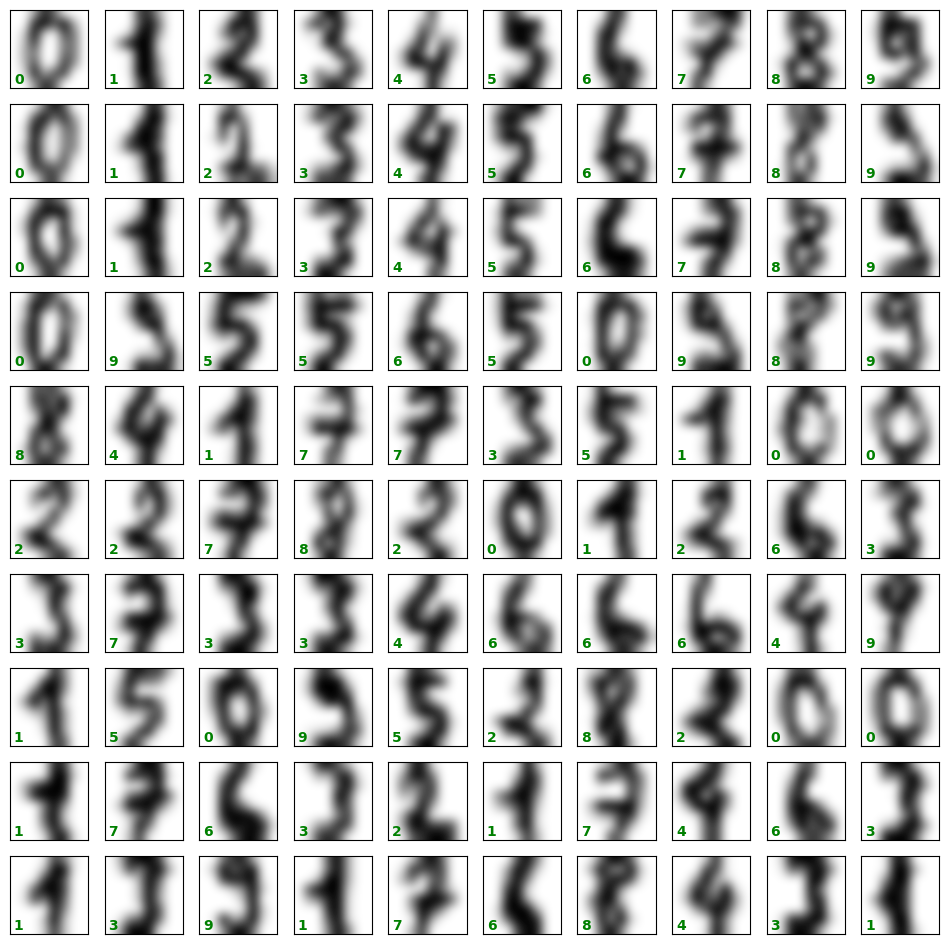

In [8]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', 
              interpolation='bicubic')
    ax.text(0.05, 0.05, str(digits.target[i]), color='green', 
            weight='semibold', transform=ax.transAxes)

### Digits Classification Model

In [9]:
# grab all data (1,797 records, and 8x8=64 columns)
X = digits.data

# grab the target (true) value for each image
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=314)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


In [10]:
# define the model object
clf = RandomForestClassifier(random_state=314, max_depth=4, n_estimators=10)

# fit (train) the model
clf.fit(X_train, y_train)

# make predictions on the test data
y_preds = clf.predict(X_test)

print(f'Model accuracy: {accuracy_score(y_preds, y_test):.2%}')

Model accuracy: 87.11%


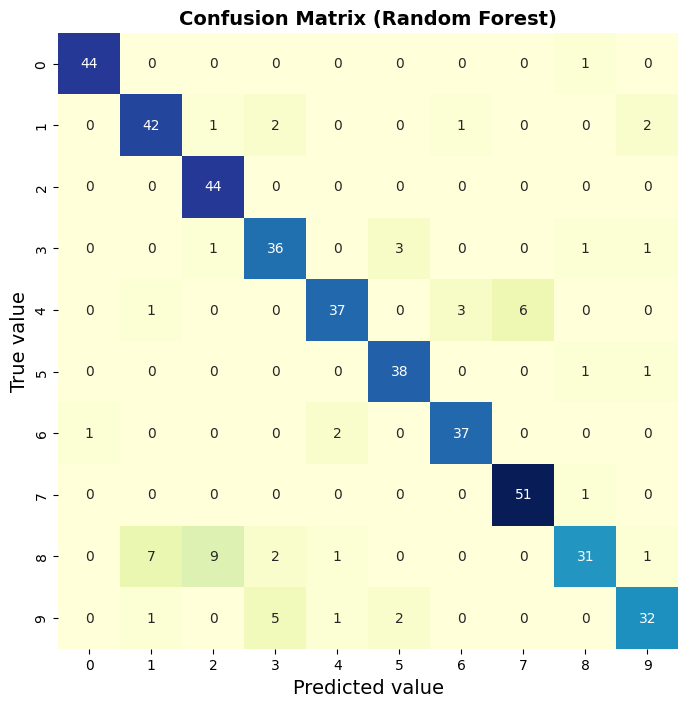

In [11]:
# confusion matrix
cfm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(8, 8))

sns.heatmap(cfm, annot=True, cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14)
plt.title('Confusion Matrix (Random Forest)', fontsize=14, weight='semibold');

### View predictions

In [12]:
y_preds_all = clf.predict(X)

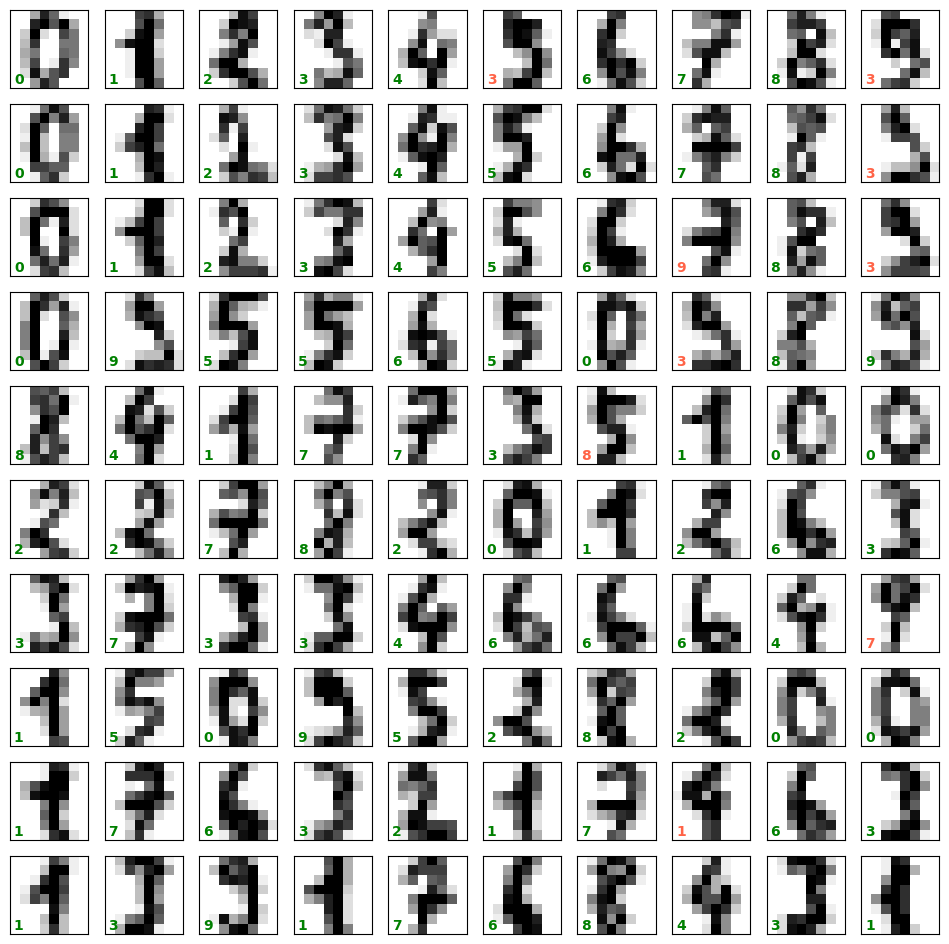

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    if y_preds_all[i] == digits.target[i]:
        ax.text(0.05, 0.05, str(y_preds_all[i]), color='green', 
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, str(y_preds_all[i]), color='tomato', 
                weight='semibold', transform=ax.transAxes)